<a href="https://colab.research.google.com/github/TOMEXES/HelloWorldMaven/blob/master/Sae_1_BUT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importation des librairie necessaire pour le projet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

# Assurez-vous que le chemin correspond à l'endroit où vous avez téléchargé le fichier
zip_path = '/content/drive/MyDrive/Sae_BUT3_IA/archive.zip'
extract_path = '/content/archive'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_height, img_width = 64, 64  # Taille à laquelle les images seront redimensionnées
batch_size = 128

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Fraction pour validation
)


# Chargement des données pour l'entraînement
train_data = datagen.flow_from_directory(
    directory='/content/archive',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',  # Pour classification binaire (homme ou femme)
    subset='training'     # Jeu d'entraînement
)

# Chargement des données pour la validation
val_data = datagen.flow_from_directory(
    directory='/content/archive',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'   # Jeu de validation
)


Found 53582 images belonging to 3 classes.
Found 13394 images belonging to 3 classes.


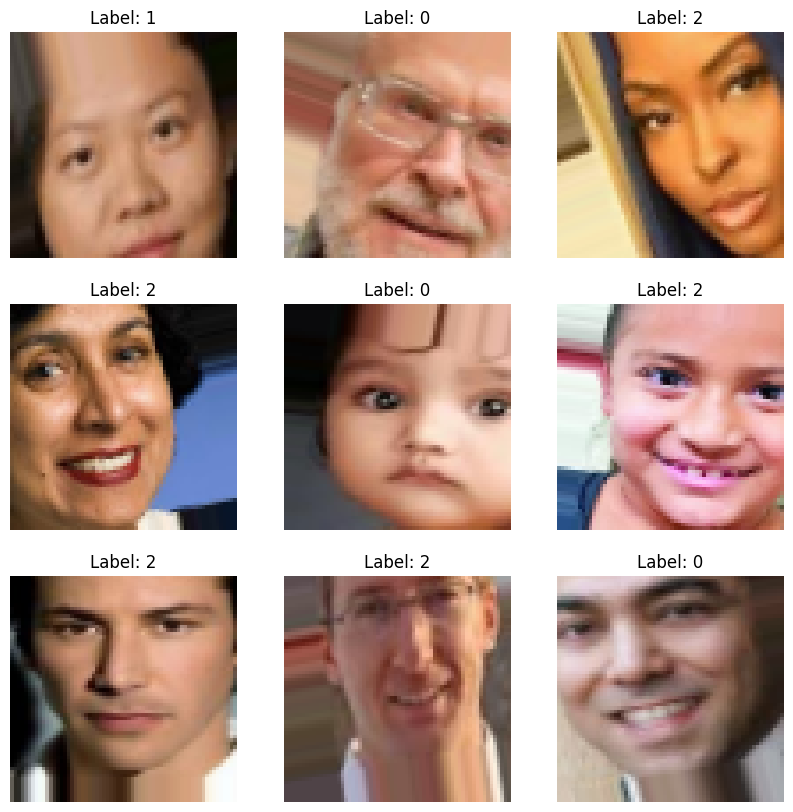

In [ ]:
import matplotlib.pyplot as plt

# Récupérer un batch d'images
images, labels = next(train_data)

# Afficher les 9 premières images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")  # Afficher le label correspondant
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Geler les poids du modèle de base

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Classification binaire
])


In [ ]:



model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "mobilenetv2_1.00_128" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 64, 64, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 64, 64, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Affichage des résultats
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
model.save('gender_classification_model.h5')
